In [1]:
import os
import json
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
import time
import copy
import gc


In [2]:
model_path = 'Models_Warwick_100/'
TRAINING_FOLDER = os.listdir(model_path+'TrainingTime/')
TRAINING_FOLDER.sort()
SUMMARY_FOLDER = os.listdir(model_path+'Summary/')
SUMMARY_FOLDER.sort()
HISTORY_FOLDER = os.listdir(model_path+'History/')
HISTORY_FOLDER.sort()
EVALUATION_FOLDER = os.listdir(model_path+'Evaluation/')
EVALUATION_FOLDER.sort()

N = len(TRAINING_FOLDER)

# Check if there's mistake
for i in range(N):
    name1 = TRAINING_FOLDER[i].split('.txt')[0]
    name2 = SUMMARY_FOLDER[i].split('.txt')[0]
    name3 = HISTORY_FOLDER[i].split('.json')[0]
    name4 = EVALUATION_FOLDER[i].split('.json')[0]
    
    if name1 == name2 and name2 == name3 and name3 == name4:
        continue
    else:
        print(i, name1, 'BEDA <<<<<<<')
    

In [3]:
combination_id = []
base = []
fr = []
layer_fcn = []
dropout = []
opt = []
lr = []
epochs = []
epoch_train_times = []
total_train_times = []
trainable_params = []
train_losses = []
val_losses = []
test_losses = []
accs = []
f1scores = []
sensis = []
specis = []

for i in range(N):
    name = TRAINING_FOLDER[i].split('.txt')[0]
    print(name)
    n = name.split(' ')
    combination_id.append(n[0][1:6])
    base.append(n[1])
    fr.append(str(int((float(n[2])*100))))
    layer_fcn.append(n[3])
    opt.append(n[4])
    lr.append(n[5])
    dropout.append(n[6])

    train_file = open(model_path+'TrainingTime/'+TRAINING_FOLDER[i], 'r').read()[1:-1].split(', ')
    p = [float(i) for i in train_file]
    
    epoch = len(train_file) #<<
#     print(epoch)
    median_train = f'{np.median(p):.4f}' #<<
    total_train = f'{np.sum(p):.4f}'
#     print(p)
    
    trainable_param = open(model_path+'Summary/'+SUMMARY_FOLDER[i], 'r').readline().rstrip().split(':')[1] #<<
#     print(trainable_param)
    
    history = json.load(open(model_path+'History/'+HISTORY_FOLDER[i]))
    train_loss = f"{min(history['Training Loss']): .4f}" #<<
    val_loss = f"{min(history['Validation Loss']): .4f}" #<<
    
#     print(train_loss)
#     print(val_loss)
    
    test_eval = json.load(open(model_path+'Evaluation/'+EVALUATION_FOLDER[i]))
    test_loss = f"{test_eval['Loss']: .4f}"
    acc = f"{test_eval['Accuracy']: .4f}"
    sensi = f"{test_eval['Sensitivity']: .4f}"
    speci = f"{test_eval['Specificity']: .4f}"
    tp = test_eval['True Pos']+1
    tn = test_eval['True Neg']+1
    fp = test_eval['False Pos']+1
    fn = test_eval['False Neg']+1
    
    
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    f1score = (2*recall*precision)/(recall+precision)
    
    epochs.append(epoch)
    epoch_train_times.append(median_train)
    total_train_times.append(total_train)
    trainable_params.append(trainable_param)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    test_losses.append(test_loss)
    accs.append(acc)
    f1scores.append(f1score)
    sensis.append(sensi)
    specis.append(speci)

    
df = pd.DataFrame()
df['Combination'] = combination_id
df['Base Model'] = base
df['Freeze Rate'] = fr
df['Layer FCN'] = layer_fcn
df['Learning Rate'] = lr
df['Optimizer'] = opt
# df['Dropout'] = dropout
df['Epoch Count'] = epochs
df['Trainable Params Count'] = trainable_params
df['Median Train Time'] = epoch_train_times
df['Total Train Time'] = (df['Median Train Time'].astype(float).to_numpy())*(df['Epoch Count'].astype(float).to_numpy())
df['Inference time per Image'] = (df['Median Train Time'].astype(float)/498)*(0.01/0.018)
# df['FPS'] = (df['Epoch Count'].astype(float).to_numpy() * 2) / df['Total Train Time'].to_numpy()
df['Best Train Loss'] = train_losses
df['Best Val Loss'] = val_losses
df['Testing Loss'] = test_losses
df['Testing Accuracy'] = accs
df['F1Score'] = f1scores
df['Testing Sensitivity'] = sensis
df['Testing Specificity'] = specis
df['Harmonic Mean'] = (2*df['Testing Sensitivity'].astype(float)*df['Testing Specificity'].astype(float))/(df['Testing Sensitivity'].astype(float)+df['Testing Specificity'].astype(float))
df

[11111] densenet121 0 0 Adam 0.0001 [11111]
[11112] densenet121 0 0 RMSprop 0.0001 [11112]
[11113] densenet121 0 0 SGD 0.0001 [11113]
[11121] densenet121 0 0 Adam 0.001 [11121]
[11122] densenet121 0 0 RMSprop 0.001 [11122]
[11123] densenet121 0 0 SGD 0.001 [11123]
[11131] densenet121 0 0 Adam 0.01 [11131]
[11132] densenet121 0 0 RMSprop 0.01 [11132]
[11133] densenet121 0 0 SGD 0.01 [11133]
[11211] densenet121 0 1 Adam 0.0001 [11211]
[11212] densenet121 0 1 RMSprop 0.0001 [11212]
[11213] densenet121 0 1 SGD 0.0001 [11213]
[11221] densenet121 0 1 Adam 0.001 [11221]
[11222] densenet121 0 1 RMSprop 0.001 [11222]
[11223] densenet121 0 1 SGD 0.001 [11223]
[11231] densenet121 0 1 Adam 0.01 [11231]
[11232] densenet121 0 1 RMSprop 0.01 [11232]
[11233] densenet121 0 1 SGD 0.01 [11233]
[11311] densenet121 0 2 Adam 0.0001 [11311]
[11312] densenet121 0 2 RMSprop 0.0001 [11312]
[11313] densenet121 0 2 SGD 0.0001 [11313]
[11321] densenet121 0 2 Adam 0.001 [11321]
[11322] densenet121 0 2 RMSprop 0.001

[22313] densenet161 0.25 2 SGD 0.0001 [22313]
[22321] densenet161 0.25 2 Adam 0.001 [22321]
[22322] densenet161 0.25 2 RMSprop 0.001 [22322]
[22323] densenet161 0.25 2 SGD 0.001 [22323]
[22331] densenet161 0.25 2 Adam 0.01 [22331]
[22332] densenet161 0.25 2 RMSprop 0.01 [22332]
[22333] densenet161 0.25 2 SGD 0.01 [22333]
[23111] densenet161 0.5 0 Adam 0.0001 [23111]
[23112] densenet161 0.5 0 RMSprop 0.0001 [23112]
[23113] densenet161 0.5 0 SGD 0.0001 [23113]
[23121] densenet161 0.5 0 Adam 0.001 [23121]
[23122] densenet161 0.5 0 RMSprop 0.001 [23122]
[23123] densenet161 0.5 0 SGD 0.001 [23123]
[23131] densenet161 0.5 0 Adam 0.01 [23131]
[23132] densenet161 0.5 0 RMSprop 0.01 [23132]
[23133] densenet161 0.5 0 SGD 0.01 [23133]
[23211] densenet161 0.5 1 Adam 0.0001 [23211]
[23212] densenet161 0.5 1 RMSprop 0.0001 [23212]
[23213] densenet161 0.5 1 SGD 0.0001 [23213]
[23221] densenet161 0.5 1 Adam 0.001 [23221]
[23222] densenet161 0.5 1 RMSprop 0.001 [23222]
[23223] densenet161 0.5 1 SGD 0.0

[34222] inception_v3 0.75 1 RMSprop 0.001 [34222]
[34223] inception_v3 0.75 1 SGD 0.001 [34223]
[34231] inception_v3 0.75 1 Adam 0.01 [34231]
[34232] inception_v3 0.75 1 RMSprop 0.01 [34232]
[34233] inception_v3 0.75 1 SGD 0.01 [34233]
[34311] inception_v3 0.75 2 Adam 0.0001 [34311]
[34312] inception_v3 0.75 2 RMSprop 0.0001 [34312]
[34313] inception_v3 0.75 2 SGD 0.0001 [34313]
[34321] inception_v3 0.75 2 Adam 0.001 [34321]
[34322] inception_v3 0.75 2 RMSprop 0.001 [34322]
[34323] inception_v3 0.75 2 SGD 0.001 [34323]
[34331] inception_v3 0.75 2 Adam 0.01 [34331]
[34332] inception_v3 0.75 2 RMSprop 0.01 [34332]
[34333] inception_v3 0.75 2 SGD 0.01 [34333]
[35111] inception_v3 1 0 Adam 0.0001 [35111]
[35112] inception_v3 1 0 RMSprop 0.0001 [35112]
[35113] inception_v3 1 0 SGD 0.0001 [35113]
[35121] inception_v3 1 0 Adam 0.001 [35121]
[35122] inception_v3 1 0 RMSprop 0.001 [35122]
[35123] inception_v3 1 0 SGD 0.001 [35123]
[35131] inception_v3 1 0 Adam 0.01 [35131]
[35132] inception_v3 

[63213] resnet50 0.5 1 SGD 0.0001 [63213]
[63221] resnet50 0.5 1 Adam 0.001 [63221]
[63222] resnet50 0.5 1 RMSprop 0.001 [63222]
[63223] resnet50 0.5 1 SGD 0.001 [63223]
[63231] resnet50 0.5 1 Adam 0.01 [63231]
[63232] resnet50 0.5 1 RMSprop 0.01 [63232]
[63233] resnet50 0.5 1 SGD 0.01 [63233]
[63311] resnet50 0.5 2 Adam 0.0001 [63311]
[63312] resnet50 0.5 2 RMSprop 0.0001 [63312]
[63313] resnet50 0.5 2 SGD 0.0001 [63313]
[63321] resnet50 0.5 2 Adam 0.001 [63321]
[63322] resnet50 0.5 2 RMSprop 0.001 [63322]
[63323] resnet50 0.5 2 SGD 0.001 [63323]
[63331] resnet50 0.5 2 Adam 0.01 [63331]
[63332] resnet50 0.5 2 RMSprop 0.01 [63332]
[63333] resnet50 0.5 2 SGD 0.01 [63333]
[64111] resnet50 0.75 0 Adam 0.0001 [64111]
[64112] resnet50 0.75 0 RMSprop 0.0001 [64112]
[64113] resnet50 0.75 0 SGD 0.0001 [64113]
[64121] resnet50 0.75 0 Adam 0.001 [64121]
[64122] resnet50 0.75 0 RMSprop 0.001 [64122]
[64123] resnet50 0.75 0 SGD 0.001 [64123]
[64131] resnet50 0.75 0 Adam 0.01 [64131]
[64132] resnet

[75113] resnext50_32x4d 1 0 SGD 0.0001 [75113]
[75121] resnext50_32x4d 1 0 Adam 0.001 [75121]
[75122] resnext50_32x4d 1 0 RMSprop 0.001 [75122]
[75123] resnext50_32x4d 1 0 SGD 0.001 [75123]
[75131] resnext50_32x4d 1 0 Adam 0.01 [75131]
[75132] resnext50_32x4d 1 0 RMSprop 0.01 [75132]
[75133] resnext50_32x4d 1 0 SGD 0.01 [75133]
[75211] resnext50_32x4d 1 1 Adam 0.0001 [75211]
[75212] resnext50_32x4d 1 1 RMSprop 0.0001 [75212]
[75213] resnext50_32x4d 1 1 SGD 0.0001 [75213]
[75221] resnext50_32x4d 1 1 Adam 0.001 [75221]
[75222] resnext50_32x4d 1 1 RMSprop 0.001 [75222]
[75223] resnext50_32x4d 1 1 SGD 0.001 [75223]
[75231] resnext50_32x4d 1 1 Adam 0.01 [75231]
[75232] resnext50_32x4d 1 1 RMSprop 0.01 [75232]
[75233] resnext50_32x4d 1 1 SGD 0.01 [75233]
[75311] resnext50_32x4d 1 2 Adam 0.0001 [75311]
[75312] resnext50_32x4d 1 2 RMSprop 0.0001 [75312]
[75313] resnext50_32x4d 1 2 SGD 0.0001 [75313]
[75321] resnext50_32x4d 1 2 Adam 0.001 [75321]
[75322] resnext50_32x4d 1 2 RMSprop 0.001 [75322

,Combination,Base Model,Freeze Rate,Layer FCN,Learning Rate,Optimizer,Epoch Count,Trainable Params Count,Median Train Time,Total Train Time,Inference time per Image,Best Train Loss,Best Val Loss,Testing Loss,Testing Accuracy,F1Score,Testing Sensitivity,Testing Specificity,Harmonic Mean
0,11111,densenet121,0,0,0.0001,Adam,14,6955906,2.5784,36.0976,0.002876,0.0124,0.0713,0.1785,0.9417,0.952381,0.9271,1.0000,0.962171
1,11112,densenet121,0,0,0.0001,RMSprop,11,6955906,2.4462,26.9082,0.002729,0.0097,0.0736,0.1199,0.9417,0.952381,0.9271,1.0000,0.962171
2,11113,densenet121,0,0,0.0001,SGD,100,6955906,2.4084,240.8400,0.002687,0.0727,0.1378,0.1872,0.9250,0.941799,0.9167,0.9583,0.937039
3,11121,densenet121,0,0,0.001,Adam,20,6955906,2.5855,51.7100,0.002884,0.0388,0.1119,0.1441,0.9417,0.952381,0.9271,1.0000,0.962171
4,11122,densenet121,0,0,0.001,RMSprop,100,6955906,2.4161,241.6100,0.002695,0.0390,0.1348,0.1893,0.9417,0.952381,0.9271,1.0000,0.962171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,75322,resnext50_32x4d,100,2,0.001,RMSprop,100,2624002,1.6248,162.4800,0.001813,0.1342,0.1886,0.1329,0.9500,0.958763,0.9583,0.9167,0.937039
941,75323,resnext50_32x4d,100,2,0.001,SGD,100,2624002,1.6024,160.2400,0.001788,0.1568,0.2023,0.2034,0.9583,0.963351,0.9479,1.0000,0.973253
942,75331,resnext50_32x4d,100,2,0.01,Adam,100,2624002,1.6233,162.3300,0.001811,0.1266,0.1929,0.1636,0.9583,0.963731,0.9583,0.9583,0.958300
943,75332,resnext50_32x4d,100,2,0.01,RMSprop,100,2624002,1.5952,159.5200,0.001780,0.1821,0.1860,0.1883,0.9417,0.952880,0.9375,0.9583,0.947786


In [4]:
df

,Combination,Base Model,Freeze Rate,Layer FCN,Learning Rate,Optimizer,Epoch Count,Trainable Params Count,Median Train Time,Total Train Time,Inference time per Image,Best Train Loss,Best Val Loss,Testing Loss,Testing Accuracy,F1Score,Testing Sensitivity,Testing Specificity,Harmonic Mean
0,11111,densenet121,0,0,0.0001,Adam,14,6955906,2.5784,36.0976,0.002876,0.0124,0.0713,0.1785,0.9417,0.952381,0.9271,1.0000,0.962171
1,11112,densenet121,0,0,0.0001,RMSprop,11,6955906,2.4462,26.9082,0.002729,0.0097,0.0736,0.1199,0.9417,0.952381,0.9271,1.0000,0.962171
2,11113,densenet121,0,0,0.0001,SGD,100,6955906,2.4084,240.8400,0.002687,0.0727,0.1378,0.1872,0.9250,0.941799,0.9167,0.9583,0.937039
3,11121,densenet121,0,0,0.001,Adam,20,6955906,2.5855,51.7100,0.002884,0.0388,0.1119,0.1441,0.9417,0.952381,0.9271,1.0000,0.962171
4,11122,densenet121,0,0,0.001,RMSprop,100,6955906,2.4161,241.6100,0.002695,0.0390,0.1348,0.1893,0.9417,0.952381,0.9271,1.0000,0.962171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,75322,resnext50_32x4d,100,2,0.001,RMSprop,100,2624002,1.6248,162.4800,0.001813,0.1342,0.1886,0.1329,0.9500,0.958763,0.9583,0.9167,0.937039
941,75323,resnext50_32x4d,100,2,0.001,SGD,100,2624002,1.6024,160.2400,0.001788,0.1568,0.2023,0.2034,0.9583,0.963351,0.9479,1.0000,0.973253
942,75331,resnext50_32x4d,100,2,0.01,Adam,100,2624002,1.6233,162.3300,0.001811,0.1266,0.1929,0.1636,0.9583,0.963731,0.9583,0.9583,0.958300
943,75332,resnext50_32x4d,100,2,0.01,RMSprop,100,2624002,1.5952,159.5200,0.001780,0.1821,0.1860,0.1883,0.9417,0.952880,0.9375,0.9583,0.947786


In [9]:
print(df['Inference time per Image'].max())
print(df['Inference time per Image'].min())
print(.max()- df['Inference time per Image'].min())

0.008152833556448016
0.001677822400713967
0.006475011155734049


In [5]:
data_acc = df.sort_values(by=['Harmonic Mean', 'Testing Loss', 'Total Train Time'], ascending=[False, True, True]).reset_index(drop=True)
data_acc[['Combination', 'Base Model', 'Freeze Rate', 'Layer FCN', 'Learning Rate', 'Optimizer', 'Testing Loss', 'Testing Accuracy', 'Testing Sensitivity', 'Testing Specificity', 'Harmonic Mean']].head(15)

,Combination,Base Model,Freeze Rate,Layer FCN,Learning Rate,Optimizer,Testing Loss,Testing Accuracy,Testing Sensitivity,Testing Specificity,Harmonic Mean
0,33131,inception_v3,50,0,0.01,Adam,0.1202,0.9833,0.9792,1.0000,0.989491
1,43212,mobilenet_v2,50,1,0.0001,RMSprop,0.0452,0.9750,0.9688,1.0000,0.984153
2,44231,mobilenet_v2,75,1,0.01,Adam,0.0597,0.9750,0.9688,1.0000,0.984153
3,73133,resnext50_32x4d,50,0,0.01,SGD,0.0678,0.9750,0.9688,1.0000,0.984153
4,24332,densenet161,75,2,0.01,RMSprop,0.0725,0.9750,0.9688,1.0000,0.984153
5,14332,densenet121,75,2,0.01,RMSprop,0.0765,0.9750,0.9688,1.0000,0.984153
6,44221,mobilenet_v2,75,1,0.001,Adam,0.0802,0.9750,0.9688,1.0000,0.984153
7,43221,mobilenet_v2,50,1,0.001,Adam,0.0823,0.9750,0.9688,1.0000,0.984153
8,73233,resnext50_32x4d,50,1,0.01,SGD,0.0894,0.9750,0.9688,1.0000,0.984153
9,74211,resnext50_32x4d,75,1,0.0001,Adam,0.0927,0.9750,0.9688,1.0000,0.984153


In [6]:
data_time = df.sort_values(by=['Total Train Time', 'Harmonic Mean'], ascending=[True, False]).reset_index(drop=True)
data_time[['Combination','Base Model', 'Freeze Rate', 'Layer FCN', 'Learning Rate', 'Optimizer', 'Epoch Count','Median Train Time','Total Train Time','Harmonic Mean']].head(15)

,Combination,Base Model,Freeze Rate,Layer FCN,Learning Rate,Optimizer,Epoch Count,Median Train Time,Total Train Time,Harmonic Mean
0,54111,resnet18,75,0,0.0001,Adam,10,1.5989,15.9890,0.950792
1,74312,resnext50_32x4d,75,2,0.0001,RMSprop,10,1.7242,17.2420,0.967742
2,12112,densenet121,25,0,0.0001,RMSprop,10,1.8546,18.5460,0.978706
3,33133,inception_v3,50,0,0.01,SGD,11,1.6978,18.6758,0.950792
4,74311,resnext50_32x4d,75,2,0.0001,Adam,11,1.7198,18.9178,0.967742
5,74133,resnext50_32x4d,75,0,0.01,SGD,11,1.7339,19.0729,0.967742
6,74112,resnext50_32x4d,75,0,0.0001,RMSprop,11,1.7427,19.1697,0.978706
7,14122,densenet121,75,0,0.001,RMSprop,10,1.9504,19.5040,0.984153
8,53212,resnet18,50,1,0.0001,RMSprop,12,1.6392,19.6704,0.967742
9,51233,resnet18,0,1,0.01,SGD,10,1.9717,19.7170,0.950792


<AxesSubplot:xlabel='Harmonic Mean', ylabel='Count'>

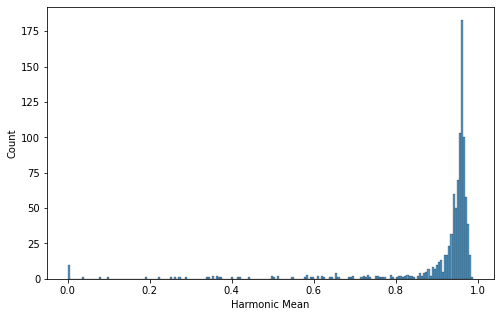

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Harmonic Mean'])

C:\Users\Helmi Alf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Helmi Alf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Helmi Alf\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\H

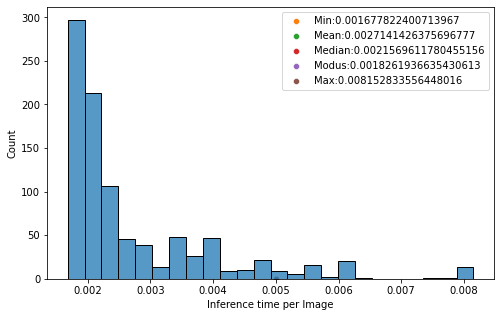

In [16]:
time = df['Inference time per Image']
plt.figure(figsize=(8, 5))
sns.histplot(df['Inference time per Image'])
sns.scatterplot([0.005],[0.005])
sns.scatterplot([0.005],[0.005])
sns.scatterplot([0.005],[0.005])
sns.scatterplot([0.005],[0.005])
sns.scatterplot([0.005],[0.005])
plt.gca().legend(('Min:'+str(time.min()), 'Mean:'+str(time.mean()), 'Median:'+str(time.median()), 'Modus:'+str(time.mode()[0]), 'Max:'+str(time.max())))
plt.show()

<AxesSubplot:xlabel='Total Train Time', ylabel='Count'>

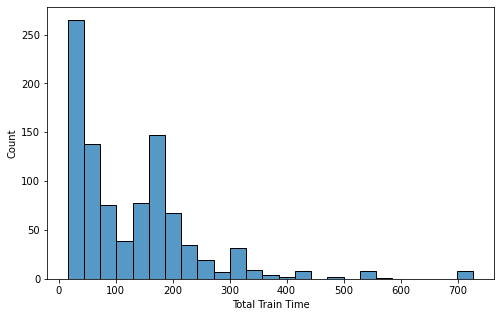

In [7]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Total Train Time'])

In [5]:
def get_name(data, col_list):
    res = []
    for i in range (len(data[col_list[0]])):
        row_res = ''
        for col in col_list:
            row_res += data[col][i]+'-'
        res.append(row_res)
    return res

# ['Base Model', 'Freeze Rate', 'Layer FCN', 'Learning Rate', 'Optimizer']

In [16]:
arsitektur_model = df['Base Model'].unique()
for model in arsitektur_model:
    sort_by_acc = df[(df['Base Model']==model)&(df['Freeze Rate']=-'0')][['Combination', 'Name', 'Harmonic Mean','Total Train Time']].sort_values(by=['Total Train Time'], ascending=[True]).reset_index(drop=True)
    best_acc = sort_by_acc.iloc[0]
    print(model)
    print(best_acc)
    

SyntaxError: invalid syntax (<ipython-input-16-f98a439f7f72>, line 3)

In [12]:
harmonic_mean = df['Harmonic Mean'].unique()
harmonic_mean = pd.Series(harmonic_mean).sort_values(ascending=False)
harmonic_mean

71     0.989491
5      0.984153
19     0.978706
116    0.973699
20     0.973253
         ...   
65     0.192311
123    0.099040
113    0.080061
75     0.040752
49     0.000000
Length: 139, dtype: float64

In [7]:
df['Name'] = get_name(df, ['Base Model', 'Freeze Rate', 'Layer FCN', 'Learning Rate', 'Optimizer'])

In [16]:
for i in range(10):
    mean = harmonic_mean.iloc[i]
#     print(mean)
    df_grouped_GM = df[df['Harmonic Mean'] == mean]
    df_grouped_GM = df_grouped_GM.sort_values(by='Total Train Time', ascending=True).reset_index(drop=True)
#     print(df_grouped_GM)
    fastest = df_grouped_GM.loc[0]
    print(mean, fastest['Name'], fastest['Total Train Time'])

0.9894907033144704 inception_v3-50-0-0.01-Adam- 49.50240000000001
0.9841527834213735 densenet121-75-0-0.001-RMSprop- 19.503999999999998
0.978706020528009 densenet121-25-0-0.0001-RMSprop- 18.546
0.9736985266184095 resnet50-0-1-0.0001-Adam- 89.648
0.9732532470866061 resnext50_32x4d-75-1-0.0001-RMSprop- 20.3712
0.967741935483871 resnext50_32x4d-75-2-0.0001-RMSprop- 17.242
0.9635213948419905 densenet121-50-0-0.0001-RMSprop- 28.8108
0.9621711379793473 densenet121-50-1-0.001-Adam- 20.1948
0.9583 densenet121-50-0-0.0001-Adam- 36.0888
0.9565398862628475 mobilenet_v2-75-0-0.01-SGD- 20.6388


In [12]:
train_time = df['Total Train Time'].sort_values()
train_time

621     15.9890
910     17.2420
28      18.5460
332     18.6758
909     18.9178
         ...   
160    712.0800
151    713.1600
148    714.2000
150    724.1600
159    727.9100
Name: Total Train Time, Length: 945, dtype: float64

In [13]:
np.percentile(train_time, (10, 30, 50))

array([27.91932, 47.91376, 98.4943 ])

In [14]:
df_q1 = df[df['Total Train Time'] < 28]
df_q1 = df_q1.sort_values(by=['Harmonic Mean', 'Total Train Time'], ascending=[False, True]).reset_index(drop=True)
df_q1['Name'] = get_name(df_q1, ['Base Model', 'Freeze Rate', 'Layer FCN', 'Learning Rate', 'Optimizer'])
df_q1 = df_q1[['Combination','Name', 'Epoch Count','Median Train Time','Total Train Time', 'Harmonic Mean']]
df_q1

,Combination,Name,Epoch Count,Median Train Time,Total Train Time,Balanced Accuracy
0,14122,densenet121-75-0-0.001-RMSprop-,10,1.9504,19.5040,0.984276
1,73233,resnext50_32x4d-50-1-0.01-SGD-,12,1.8424,22.1088,0.984276
2,74211,resnext50_32x4d-75-1-0.0001-Adam-,13,1.7284,22.4692,0.984276
3,14131,densenet121-75-0-0.01-Adam-,13,1.8882,24.5466,0.984276
4,74333,resnext50_32x4d-75-2-0.01-SGD-,16,1.6865,26.9840,0.984276
...,...,...,...,...,...,...
91,33321,inception_v3-50-2-0.001-Adam-,13,1.7653,22.9489,0.937269
92,33233,inception_v3-50-1-0.01-SGD-,14,1.7158,24.0212,0.937269
93,33212,inception_v3-50-1-0.0001-RMSprop-,13,1.6533,21.4929,0.935414
94,51312,resnet18-0-2-0.0001-RMSprop-,13,1.8938,24.6194,0.924229


In [15]:
df_q2 = df[(df['Total Train Time'] >= 28) & (df['Total Train Time'] < 48)]
df_q2 = df_q2.sort_values(by=['Harmonic Mean', 'Total Train Time'], ascending=[False, True]).reset_index(drop=True)
df_q2['Name'] = get_name(df_q2, ['Base Model', 'Freeze Rate', 'Layer FCN', 'Learning Rate', 'Optimizer'])
df_q2 = df_q2[['Combination','Name', 'Epoch Count','Median Train Time','Total Train Time', 'Harmonic Mean']]
df_q2

,Combination,Name,Epoch Count,Median Train Time,Total Train Time,Balanced Accuracy
0,73133,resnext50_32x4d-50-0-0.01-SGD-,15,1.8834,28.2510,0.984276
1,44231,mobilenet_v2-75-1-0.01-Adam-,19,1.5593,29.6267,0.984276
2,44221,mobilenet_v2-75-1-0.001-Adam-,25,1.5538,38.8450,0.984276
3,11211,densenet121-0-1-0.0001-Adam-,16,2.5718,41.1488,0.984276
4,73333,resnext50_32x4d-50-2-0.01-SGD-,15,1.9207,28.8105,0.978928
...,...,...,...,...,...,...
184,32123,inception_v3-25-0-0.001-SGD-,23,1.7900,41.1700,0.926523
185,71221,resnext50_32x4d-0-1-0.001-Adam-,16,2.5823,41.3168,0.921129
186,33222,inception_v3-50-1-0.001-RMSprop-,25,1.6936,42.3400,0.911435
187,41121,mobilenet_v2-0-0-0.001-Adam-,17,2.4928,42.3776,0.878950


In [16]:
df_q3 = df[(df['Total Train Time'] >= 48)]
df_q3 = df_q3.sort_values(by=['Harmonic Mean', 'Total Train Time'], ascending=[False, True]).reset_index(drop=True)
df_q3['Name'] = get_name(df_q3, ['Base Model', 'Freeze Rate', 'Layer FCN', 'Learning Rate', 'Optimizer'])
df_q3 = df_q3[['Combination','Name', 'Epoch Count','Median Train Time','Total Train Time', 'Harmonic Mean']]
df_q3

,Combination,Name,Epoch Count,Median Train Time,Total Train Time,Balanced Accuracy
0,33131,inception_v3-50-0-0.01-Adam-,24,2.0626,49.5024,0.989545
1,43212,mobilenet_v2-50-1-0.0001-RMSprop-,36,1.5755,56.7180,0.984276
2,43221,mobilenet_v2-50-1-0.001-Adam-,45,1.5675,70.5375,0.984276
3,44323,mobilenet_v2-75-2-0.001-SGD-,100,1.5534,155.3400,0.984276
4,75132,resnext50_32x4d-100-0-0.01-RMSprop-,100,1.6267,162.6700,0.984276
...,...,...,...,...,...,...
655,31332,inception_v3-0-2-0.01-RMSprop-,100,2.1820,218.2000,0.000000
656,31232,inception_v3-0-1-0.01-RMSprop-,100,2.1935,219.3500,0.000000
657,31331,inception_v3-0-2-0.01-Adam-,100,2.2853,228.5300,0.000000
658,71331,resnext50_32x4d-0-2-0.01-Adam-,100,2.6125,261.2500,0.000000


In [17]:
hyperparameters = {
	'Base Model': ['mobilenet_v2', 'resnet50', 'resnet18', 'densenet161', 'densenet121', 'inception_v3', 'resnext50_32x4d'],
	'Freeze Rate': ['0', '25', '50', '75', '100'],
	'Layer FCN' : ['0', '1', '2'],
	'Learning Rate': ['0.01', '0.001', '0.0001'],
	'Optimizer' : ['RMSprop', 'SGD', 'Adam']
}

In [18]:
df_ranking_acc = df.sort_values(by=['Harmonic Mean', 'Testing Loss', 'Total Train Time'], ascending=[False, True, True]).reset_index(drop=True)

for param in hyperparameters.keys():
    print('Hyperparameter : '+param)
    for val in hyperparameters[param]:
        filtered = df_ranking_acc[df_ranking_acc[param]==val]
        print('\t'+val+': Best Rank', filtered.iloc[0].name, '-- ', filtered.iloc[0]['Testing Accuracy'])
        
    

Hyperparameter : Base Model
	mobilenet_v2: Best Rank 1 --   0.9750
	resnet50: Best Rank 38 --   0.9667
	resnet18: Best Rank 27 --   0.9667
	densenet161: Best Rank 4 --   0.9750
	densenet121: Best Rank 5 --   0.9750
	inception_v3: Best Rank 0 --   0.9833
	resnext50_32x4d: Best Rank 3 --   0.9750
Hyperparameter : Freeze Rate
	0: Best Rank 10 --   0.9750
	25: Best Rank 18 --   0.9667
	50: Best Rank 0 --   0.9833
	75: Best Rank 2 --   0.9750
	100: Best Rank 17 --   0.9750
Hyperparameter : Layer FCN
	0: Best Rank 0 --   0.9833
	1: Best Rank 1 --   0.9750
	2: Best Rank 4 --   0.9750
Hyperparameter : Learning Rate
	0.01: Best Rank 0 --   0.9833
	0.001: Best Rank 6 --   0.9750
	0.0001: Best Rank 1 --   0.9750
Hyperparameter : Optimizer
	RMSprop: Best Rank 1 --   0.9750
	SGD: Best Rank 3 --   0.9750
	Adam: Best Rank 0 --   0.9833
